# Drive and Instat Visualization

In [1]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Upload and Clean DRIVE Data

In [2]:
json_files = ['/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700002NCAHOPUN240930SK.json', 
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700003NCAHOPUN241002SK.json', 
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700005NCAHOPUN241008SK.json', 
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700006NCAHOCUN241008SK.json',
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700008NCAHOPUN241015SK.json',
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700009NCAHOPUN241022SK.json',
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700010NCAUSGHO241026MC.json',
              '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/data/drive/SC700011NCAHOPUN241204HA.json']

# Create a dictionary to store DataFrames
dataframes = {}

# Read each JSON file and create a DataFrame
for json_file in json_files:
    if os.path.exists(json_file):
        with open(json_file, 'r') as file:
            data = json.load(file)
            drive = pd.DataFrame(data)
           # dataframes[json_file] = drive
    else:
        print(f"File not found: {json_file}")

# Print the DataFrames
for file_name, drive in dataframes.items():
    print(f"DataFrame for {file_name}:")


In [3]:
drive.head()

,tagId,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,...,lean,skatingEdge,g_force_avg,g_force_peak,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi
0,0012,1733317525800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,...,1.564215,linear,1.011,True,False,0.759662,1,entered,0,0.1
1,0012,1733317525900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,...,1.564257,linear,1.011,False,False,0.759662,1,entered,0,0.2
2,0012,1733317526000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,...,1.564299,linear,1.011,False,False,0.759662,1,entered,0,0.3
3,0012,1733317526100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,...,1.564343,linear,1.011,False,False,0.759662,1,entered,0,0.4
4,0012,1733317526200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,...,1.564388,linear,1.011,False,False,0.759662,1,entered,0,0.5


In [4]:
# Impute missing 'sustained_speed' with the median
if 'sustained_speed' in drive.columns:
    median_sustained_speed = drive['sustained_speed'].median()
    drive['sustained_speed'].fillna(median_sustained_speed, inplace=True)

# Address inconsistencies: Remove rows with non-numeric values in 'speed' and 'acceleration'
for col in ['speed', 'acceleration']:
    if col in drive.columns:
        drive = drive[pd.to_numeric(drive[col], errors='coerce').notnull()]
        drive[col] = pd.to_numeric(drive[col])

display(drive.head())
display(drive.info())

/var/folders/fn/1h19dxrs6m105yhjv2k86ryr0000gn/T/ipykernel_8075/1111583611.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drive['sustained_speed'].fillna(median_sustained_speed, inplace=True)


,tagId,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,...,lean,skatingEdge,g_force_avg,g_force_peak,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi
0,0012,1733317525800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,...,1.564215,linear,1.011,True,False,0.759662,1,entered,0,0.1
1,0012,1733317525900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,...,1.564257,linear,1.011,False,False,0.759662,1,entered,0,0.2
2,0012,1733317526000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,...,1.564299,linear,1.011,False,False,0.759662,1,entered,0,0.3
3,0012,1733317526100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,...,1.564343,linear,1.011,False,False,0.759662,1,entered,0,0.4
4,0012,1733317526200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,...,1.564388,linear,1.011,False,False,0.759662,1,entered,0,0.5


<class 'pandas.core.frame.DataFrame'>
Index: 1092670 entries, 0 to 1092669
Data columns (total 39 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   tagId             1092670 non-null  object 
 1   timestamp         1092670 non-null  int64  
 2   x                 1092670 non-null  float64
 3   y                 1092670 non-null  float64
 4   vx                1092670 non-null  float64
 5   vy                1092670 non-null  float64
 6   q                 1092670 non-null  int64  
 7   superframe        1092670 non-null  int64  
 8   speed             1092670 non-null  float64
 9   acceleration      1092670 non-null  float64
 10  ax                1092670 non-null  float64
 11  ay                1092670 non-null  float64
 12  totalDistance     1092670 non-null  float64
 13  displacement      1092670 non-null  float64
 14  playerId          1092670 non-null  object 
 15  gameStatus        1092670 non-null  object 
 16  skati

None

In [5]:
# Convert all boolean columns to 0 and 1
bool_columns = drive.select_dtypes(include=['bool']).columns
drive[bool_columns] = drive[bool_columns].astype(int)

# Display the first few rows to confirm changes
display(drive.head())

,tagId,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,...,lean,skatingEdge,g_force_avg,g_force_peak,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi
0,0012,1733317525800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,...,1.564215,linear,1.011,1,0,0.759662,1,entered,0,0.1
1,0012,1733317525900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,...,1.564257,linear,1.011,0,0,0.759662,1,entered,0,0.2
2,0012,1733317526000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,...,1.564299,linear,1.011,0,0,0.759662,1,entered,0,0.3
3,0012,1733317526100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,...,1.564343,linear,1.011,0,0,0.759662,1,entered,0,0.4
4,0012,1733317526200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,...,1.564388,linear,1.011,0,0,0.759662,1,entered,0,0.5


In [6]:
# Select non-numerical columns
non_numerical_columns = drive.select_dtypes(exclude=['float64', 'int64']).columns

# Display unique entries for each non-numerical column
for col in non_numerical_columns:
    unique_entries = drive[col].unique()
    print(f"Column: {col}")
    print(f"Unique entries: {unique_entries}")
    print('-------------------------')

Column: tagId
Unique entries: ['0012' '00EA' '0169' '01AF' '01B9' '01C1' '022F' '0346' '14AF' '1936'
 '19D3' '1A0F' '1A5E' '2004' '2300' '2330' '23CE' '23E5' '23EB' '2E53'
 '3567']
-------------------------
Column: playerId
Unique entries: ['h26' 'h35' 'h77' 'h10' 'h15' 'h8' 'h21' 'h42' 'h91' 'h88' 'h11' 'h22'
 'h13' 'h19' 'h5' 'h6' 'h16' 'h47' 'h48' 'h4' 'h9']
-------------------------
Column: gameStatus
Unique entries: ['on']
-------------------------
Column: zone
Unique entries: ['P33' 'P44' 'P45' 'P34' 'P24' 'P25' 'P23' 'P22' 'P21' 'N41' 'N42' 'N43'
 'N45' 'N46' 'N54' 'P11' 'N31' 'N21' 'P41' 'P42' 'P43' 'P35' 'N51' 'N52'
 'N53' 'N44' 'P31' 'P32' 'N32' 'N22' 'P53' 'P52' 'P51' 'N11' 'N12' 'N13'
 'N14' 'N26' 'N36' '0' 'P12' 'N34' 'N24' 'N25' 'N23' 'N99' 'N35' 'P13'
 'N33' 'P26' 'P14' 'P46' 'P99' 'P36' 'P54']
-------------------------
Column: playingPosition
Unique entries: ['d' 'g' 'f' None]
-------------------------
Column: team
Unique entries: ['h']
-------------------------
Column:

In [7]:
# Keep a copy of the original categorical columns
drive['zone_cat'] = drive['zone']
drive['skatingEdge_cat'] = drive['skatingEdge']
drive['playerShift_cat'] = drive['playerShift']

# Encode the categorical columns
drive['zone'] = drive['zone'].astype('category').cat.codes
drive['skatingEdge'] = drive['skatingEdge'].astype('category').cat.codes
drive['playerShift'] = drive['playerShift'].astype('category').cat.codes

# Drop the 'team', 'gameStatus' and 'tagId' columns
drive.drop(columns=['gameStatus', 'tagId', 'team'], inplace=True)

# Display the first few rows to confirm changes
display(drive.head())

,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,ax,...,g_force_peak,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi,zone_cat,skatingEdge_cat,playerShift_cat
0,1733317525800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,0.073474,...,1,0,0.759662,1,1,0,0.1,P33,linear,entered
1,1733317525900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,0.073489,...,0,0,0.759662,1,1,0,0.2,P33,linear,entered
2,1733317526000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,0.073441,...,0,0,0.759662,1,1,0,0.3,P33,linear,entered
3,1733317526100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,0.073306,...,0,0,0.759662,1,1,0,0.4,P33,linear,entered
4,1733317526200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,0.073062,...,0,0,0.759662,1,1,0,0.5,P33,linear,entered


In [8]:
# Check data types
print(drive.dtypes)

# Convert columns to numerical types, handling errors
columns_to_convert = ['speed', 'acceleration', 'ax', 'ay', 'totalDistance', 'displacement', 'skatingAngle', 'speedUp', 'endurance', 'endurance_on', 'speedDown_end', 'speedUp_start', 'gap', 'curvature', 'radius_curvature', 'a_tot', 'a_centripetal', 'g_force', 'g_force_avg', 'g_force_peak', 'sustained_speed', 'toi', 'playerShiftNum']
for col in columns_to_convert:
    if col in drive.columns:
        drive[col] = pd.to_numeric(drive[col], errors='coerce')

# Print info to confirm data types
print(drive.info())

timestamp             int64
x                   float64
y                   float64
vx                  float64
vy                  float64
q                     int64
superframe            int64
speed               float64
acceleration        float64
ax                  float64
ay                  float64
totalDistance       float64
displacement        float64
playerId             object
skatingAngle        float64
speedUp               int64
zone                   int8
playingPosition      object
speedDown_end         int64
speedUp_start         int64
gap                   int64
curvature           float64
radius_curvature    float64
a_tot               float64
a_centripetal       float64
g_force             float64
lean                float64
skatingEdge            int8
g_force_avg         float64
g_force_peak          int64
deaccel               int64
sustained_speed     float64
anomaly               int64
playerShift            int8
playerShiftNum        int64
toi                 

In [9]:
drive.head()

,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,ax,...,g_force_peak,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi,zone_cat,skatingEdge_cat,playerShift_cat
0,1733317525800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,0.073474,...,1,0,0.759662,1,1,0,0.1,P33,linear,entered
1,1733317525900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,0.073489,...,0,0,0.759662,1,1,0,0.2,P33,linear,entered
2,1733317526000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,0.073441,...,0,0,0.759662,1,1,0,0.3,P33,linear,entered
3,1733317526100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,0.073306,...,0,0,0.759662,1,1,0,0.4,P33,linear,entered
4,1733317526200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,0.073062,...,0,0,0.759662,1,1,0,0.5,P33,linear,entered


# Upload Cleaned Instat Data

In [10]:
# Define the path to the Excel file
games_cleaned_path = '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/DataCleaning/Instat_DataCleaning/games_cleaned.xlsx'

# Read the Excel file into a DataFrame
instat_games = pd.read_excel(games_cleaned_path)

# Display the first few rows of the DataFrame
display(instat_games.head())

,Date,Opponent,Penalties,Penalties drawn,Penalty time,Faceoffs,Faceoffs won,"Faceoffs won, %",Hits,Faceoffs in DZ,...,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Shots,Shots on goal,Blocked shots,Type,Hood Score,Opponent Score
0,08/02,vs Stevenson Mustangs,2,4,04:00,51,26,51%,1,16,...,53%,18,11,61%,46,31,7,GamesTotal,4,7
1,23/01,vs Neumann Knights,5,3,10:00,55,28,51%,0,17,...,70%,28,17,61%,82,34,29,GamesTotal,1,0
2,24/01,vs Neumann Knights,5,3,10:00,58,25,43%,0,26,...,54%,19,8,42%,58,25,24,GamesTotal,3,4
3,31/01,vs Lebanon Valley Flying Dutchmen,6,2,12:00,54,19,35%,1,30,...,60%,9,4,44%,41,19,10,GamesTotal,2,6
4,07/01,vs King's Monarchs,4,3,08:00,41,20,49%,1,15,...,58%,14,7,50%,34,11,12,GamesTotal,1,4


In [11]:
# Define the path to the Excel file
goalies_cleaned_path = '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/DataCleaning/Instat_DataCleaning/goalies_cleaned.xlsx'

# Read the Excel file into a DataFrame
instat_goalies = pd.read_excel(goalies_cleaned_path)

# Display the first few rows of the DataFrame
display(instat_goalies.head())

,Shirt number,Player,Games played,Time on ice,Goals against,Shots on goal,Saves,"Saves, %",Penalty time,Penalties drawn,...,Shootouts allowed,Shootouts,Scoring chances - total,Scoring chance saves,"Scoring chance saves, %",Type,Time on ice (mins),Time on ice (secs),Penalty time (mins),Penalty time (secs)
0,9,Maggie Grijalva,8,51:12,2.40,35.0,32.0,93.0,0,0,...,0.00,0.00,22.0,16.0,72.0,GamesTotal,51,12,0,0
1,35,Hayley Turnbull,7,49:08,3.70,35.0,31.0,89.0,00:17,0,...,0.14,0.43,28.0,19.0,68.0,GamesTotal,49,8,0,17
2,22,Kamryn Sohner,6,49:22,2.80,38.0,35.0,93.0,0,0,...,0.00,0.00,28.0,18.0,63.0,GamesTotal,49,22,0,0
3,44,Emily Warren,2,16:44,2.50,13.0,10.0,80.0,0,0,...,0.00,0.00,8.0,5.0,63.0,GamesTotal,16,44,0,0
4,9,Maggie Grijalva,8,40:25,1.75,25.0,23.0,93.0,0,0,...,0.00,0.00,16.0,11.0,73.0,EV,40,25,0,0


In [12]:
# Define the path to the Excel file
skaters_cleaned_path = '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/DataCleaning/Instat_DataCleaning/skaters_cleaned.xlsx'

# Read the Excel file into a DataFrame
instat_skaters = pd.read_excel(skaters_cleaned_path)

# Display the first few rows of the DataFrame
display(instat_skaters.head())

,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,"Faceoffs won in DZ, %",Faceoffs in NZ,Faceoffs won in NZ,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Type,Time on ice (mins),Time on ice (secs)
0,6,Alyssa Wilson,F,18:39,18,22.0,0.00,0.00,0.06,0.06,...,100.0,0.06,0.00,NaN,0.00,0.00,NaN,GamesTotal,18,39
1,12,Ella Bynan,F,17:01,18,20.0,0.00,0.17,0.11,0.28,...,48.0,2.90,1.17,40.0,4.20,2.20,51.0,GamesTotal,17,1
2,88,Reece Gall,F,14:29,18,17.0,0.17,0.00,0.00,0.00,...,34.0,1.50,0.56,37.0,1.00,0.61,61.0,GamesTotal,14,29
3,42,Averi Reider,F,08:19,17,10.0,0.00,0.06,0.00,0.06,...,NaN,0.00,0.00,NaN,0.00,0.00,NaN,GamesTotal,8,19
4,91,Olivia Sharkoski,F,12:05,18,17.0,0.11,0.00,0.00,0.00,...,38.0,0.78,0.28,36.0,0.89,0.39,44.0,GamesTotal,12,5


In [13]:
# Define the path to the Excel file
lines_cleaned_path = '/Users/sarahsetiawan/Desktop/CSCAPSTONE/Hood-Hockey/DataCleaning/Instat_DataCleaning/lines_cleaned.xlsx'

# Read the Excel file into a DataFrame
instat_lines= pd.read_excel(lines_cleaned_path)

# Display the first few rows of the DataFrame
display(instat_lines.head())

,Line,Plus/Minus,Numbers of shifts,Time on ice,Goals,Opponent's goals,Shots,Shots on goal,Opponent shots total,Shots on goal against,...,Short-handed play,Power-play played,Power play time,Successful power play,Short-handed time,Type,Time on ice (mins),Time on ice (secs),Power play time (mins),Power play time (secs)
0,"8 A. Bazylewicz, 18 A. Wilbur, 77 M. Cheesebro...",0.0,5.0,03:17,0.0,0.0,2.0,0.5,0.5,0.0,...,0.00,4.50,03:17,0.0,0,Basic,3,17,3,17
1,"15 D. Ormiston, 6 A. Wilson, 5 C. Kittell, 12 ...",-0.5,4.5,02:54,0.0,0.5,1.5,1.5,5.0,3.5,...,0.00,0.00,0,0.0,0,Basic,2,54,0,0
2,"15 D. Ormiston, 4 K. MacKinnon, 91 O. Sharkosk...",0.0,5.0,02:53,0.0,0.0,0.0,0.0,5.0,3.0,...,0.00,0.00,0,0.0,0,Basic,2,53,0,0
3,"15 D. Ormiston, 6 A. Wilson, 5 C. Kittell, 91 ...",0.0,19.0,02:53,0.0,0.0,4.0,2.7,5.0,3.3,...,0.33,0.33,00:04,0.0,0,Basic,2,53,0,4
4,"4 K. MacKinnon, 18 A. Wilbur, 6 A. Wilson, 12 ...",0.0,6.0,02:52,0.0,0.0,0.0,0.0,3.0,1.0,...,0.00,0.00,0,0.0,0,Basic,2,52,0,0


In [14]:
print(instat_skaters.columns)

Index(['Shirt number', 'Player', 'Position', 'Time on ice', 'Games played',
       'All shifts', 'Goals', 'First assist', 'Second assist', 'Assists',
       'Points', '+/-', 'Scoring chances', 'Penalties drawn', 'Penalty time',
       'Faceoffs', 'Faceoffs won', 'Faceoffs won, %', 'Hits', 'Shots',
       'Shots on goal', 'Blocked shots', 'Power play shots',
       'Short-handed shots', 'Passes to the slot', 'Faceoffs in DZ',
       'Faceoffs won in DZ', 'Faceoffs won in DZ, %', 'Faceoffs in NZ',
       'Faceoffs won in NZ', 'Faceoffs won in NZ, %', 'Faceoffs in OZ',
       'Faceoffs won in OZ', 'Faceoffs won in OZ, %', 'Type',
       'Time on ice (mins)', 'Time on ice (secs)'],
      dtype='object')


In [15]:
# Identify percentage columns
percentage_columns = ['Faceoffs won, %', 'Faceoffs won in DZ, %', 'Faceoffs won in NZ, %', 'Faceoffs won in OZ, %']

# Replace NaN values with 0.00 in the identified columns
instat_skaters[percentage_columns] = instat_skaters[percentage_columns].fillna(0.00)

# Display the first few rows to confirm changes
display(instat_skaters.head())
print(instat_skaters.dtypes)
print(instat_skaters.info())

,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,"Faceoffs won in DZ, %",Faceoffs in NZ,Faceoffs won in NZ,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Type,Time on ice (mins),Time on ice (secs)
0,6,Alyssa Wilson,F,18:39,18,22.0,0.00,0.00,0.06,0.06,...,100.0,0.06,0.00,0.0,0.00,0.00,0.0,GamesTotal,18,39
1,12,Ella Bynan,F,17:01,18,20.0,0.00,0.17,0.11,0.28,...,48.0,2.90,1.17,40.0,4.20,2.20,51.0,GamesTotal,17,1
2,88,Reece Gall,F,14:29,18,17.0,0.17,0.00,0.00,0.00,...,34.0,1.50,0.56,37.0,1.00,0.61,61.0,GamesTotal,14,29
3,42,Averi Reider,F,08:19,17,10.0,0.00,0.06,0.00,0.06,...,0.0,0.00,0.00,0.0,0.00,0.00,0.0,GamesTotal,8,19
4,91,Olivia Sharkoski,F,12:05,18,17.0,0.11,0.00,0.00,0.00,...,38.0,0.78,0.28,36.0,0.89,0.39,44.0,GamesTotal,12,5


Shirt number               int64
Player                    object
Position                  object
Time on ice               object
Games played               int64
All shifts               float64
Goals                    float64
First assist             float64
Second assist            float64
Assists                  float64
Points                   float64
+/-                      float64
Scoring chances          float64
Penalties drawn          float64
Penalty time              object
Faceoffs                 float64
Faceoffs won             float64
Faceoffs won, %          float64
Hits                     float64
Shots                    float64
Shots on goal            float64
Blocked shots            float64
Power play shots         float64
Short-handed shots       float64
Passes to the slot       float64
Faceoffs in DZ           float64
Faceoffs won in DZ       float64
Faceoffs won in DZ, %    float64
Faceoffs in NZ           float64
Faceoffs won in NZ       float64
Faceoffs w

In [16]:
# Select non-numerical columns from instat data
instat_non_numerical_columns = instat_skaters.select_dtypes(exclude=['float64', 'int64']).columns

# Display unique entries for each non-numerical column in instat data
for col in instat_non_numerical_columns:
    unique_entries = instat_skaters[col].unique()
    print(f"Column: {col}")
    print(f"Unique entries: {unique_entries}")
    print('-------------------------')

Column: Player
Unique entries: ['Alyssa Wilson' 'Ella Bynan' 'Reece Gall' 'Averi Reider'
 'Olivia Sharkoski' 'Anna Bazylewicz' 'Sofie Ancona' 'Caroline Kittell'
 'Mia Cheesebrough' 'Renata Petrella' 'Samantha Faatz' 'Astrid Wilbur'
 'Kial Morley' 'Savannah Potratz' 'Dakota Ormiston' 'Kayla MacKinnon'
 'Kaytlen Kratzer' 'Julia Marano' 'Lillian Scardicchio'
 'Lucianna Szczubiala']
-------------------------
Column: Position
Unique entries: ['F' 'D']
-------------------------
Column: Time on ice
Unique entries: ['18:39' '17:01' '14:29' '08:19' '12:05' '15:06' '22:15' '13:15' '19:36'
 '15:42' '13:31' '17:49' '10:57' '07:15' '28:10' '27:17' '24:37' '10:54'
 '11:05' '08:37' '15:24' '13:34' '11:29' '06:08' '11:11' '11:46' '17:00'
 '11:08' '14:20' '11:52' '11:07' '14:45' '10:12' '07:04' '23:00' '21:34'
 '18:19' '09:20' '10:02' '07:55' '00:41' '03:06' '00:11' '00:09' '00:51'
 '02:18' '03:19' '01:00' '02:49' '01:44' '02:14' '02:53' '00:40' '00:10'
 '02:22' '02:25' '02:41' '00:16' '01:02' '00:23' 

In [17]:
# Keep a copy of the original 'Type' column
instat_skaters['Type_cat'] = instat_skaters['Type']

# Encode the 'Type' column
instat_skaters['Type'] = instat_skaters['Type'].astype('category').cat.codes

# Display the first few rows to confirm changes
instat_skaters.head()

,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,Faceoffs in NZ,Faceoffs won in NZ,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Type,Time on ice (mins),Time on ice (secs),Type_cat
0,6,Alyssa Wilson,F,18:39,18,22.0,0.00,0.00,0.06,0.06,...,0.06,0.00,0.0,0.00,0.00,0.0,1,18,39,GamesTotal
1,12,Ella Bynan,F,17:01,18,20.0,0.00,0.17,0.11,0.28,...,2.90,1.17,40.0,4.20,2.20,51.0,1,17,1,GamesTotal
2,88,Reece Gall,F,14:29,18,17.0,0.17,0.00,0.00,0.00,...,1.50,0.56,37.0,1.00,0.61,61.0,1,14,29,GamesTotal
3,42,Averi Reider,F,08:19,17,10.0,0.00,0.06,0.00,0.06,...,0.00,0.00,0.0,0.00,0.00,0.0,1,8,19,GamesTotal
4,91,Olivia Sharkoski,F,12:05,18,17.0,0.11,0.00,0.00,0.00,...,0.78,0.28,36.0,0.89,0.39,44.0,1,12,5,GamesTotal


In [18]:
# List all distinct playerId in drive dataframe
distinct_player_ids = drive['playerId'].unique()
print("Distinct playerIds in drive dataframe:", distinct_player_ids)

# List all distinct Shirt number in instat_skaters dataframe
distinct_shirt_numbers = instat_skaters['Shirt number'].unique()
print("Distinct Shirt numbers in instat_skaters dataframe:", distinct_shirt_numbers)

Distinct playerIds in drive dataframe: ['h26' 'h35' 'h77' 'h10' 'h15' 'h8' 'h21' 'h42' 'h91' 'h88' 'h11' 'h22'
 'h13' 'h19' 'h5' 'h6' 'h16' 'h47' 'h48' 'h4' 'h9']
Distinct Shirt numbers in instat_skaters dataframe: [ 6 12 88 42 91  8 13  5 77 10 21 18 17 11 15  4 47 26 16 19]


## Merge DRIVE and Instat Skaters Dataframe

In [19]:
# Remove 'h' prefix from playerId in drive dataframe
drive['playerId_no_h'] = drive['playerId'].apply(lambda x: int(x[1:]) if x[1:].isdigit() else None)

# Perform left join
merge_drive_skaters = pd.merge(instat_skaters, drive, left_on='Shirt number', right_on='playerId_no_h', how='left')

# Display the merged dataframe
display(merge_drive_skaters.head())

,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi,zone_cat,skatingEdge_cat,playerShift_cat,playerId_no_h
0,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.1,P44,left,entered,6.0
1,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.2,P44,linear,entered,6.0
2,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.3,P44,linear,entered,6.0
3,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.4,P44,linear,entered,6.0
4,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.5,P44,linear,entered,6.0


In [20]:
merge_drive_skaters.columns

Index(['Shirt number', 'Player', 'Position', 'Time on ice', 'Games played',
       'All shifts', 'Goals', 'First assist', 'Second assist', 'Assists',
       'Points', '+/-', 'Scoring chances', 'Penalties drawn', 'Penalty time',
       'Faceoffs', 'Faceoffs won', 'Faceoffs won, %', 'Hits', 'Shots',
       'Shots on goal', 'Blocked shots', 'Power play shots',
       'Short-handed shots', 'Passes to the slot', 'Faceoffs in DZ',
       'Faceoffs won in DZ', 'Faceoffs won in DZ, %', 'Faceoffs in NZ',
       'Faceoffs won in NZ', 'Faceoffs won in NZ, %', 'Faceoffs in OZ',
       'Faceoffs won in OZ', 'Faceoffs won in OZ, %', 'Type',
       'Time on ice (mins)', 'Time on ice (secs)', 'Type_cat', 'timestamp',
       'x', 'y', 'vx', 'vy', 'q', 'superframe', 'speed', 'acceleration', 'ax',
       'ay', 'totalDistance', 'displacement', 'playerId', 'skatingAngle',
       'speedUp', 'zone', 'playingPosition', 'speedDown_end', 'speedUp_start',
       'gap', 'curvature', 'radius_curvature', 'a_tot', '

In [21]:
# Convert the 'timestamp' column to datetime
drive['timestamp'] = pd.to_datetime(drive['timestamp'], unit='ms')

# Display the updated DataFrame
display(drive.head())

# Extract the date and time into separate columns
drive['date'] = drive['timestamp'].dt.date
drive['time'] = drive['timestamp'].dt.time

# Display the updated DataFrame
display(drive[['timestamp', 'date', 'time']].head())

,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,ax,...,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi,zone_cat,skatingEdge_cat,playerShift_cat,playerId_no_h
0,2024-12-04 13:05:25.800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,0.073474,...,0,0.759662,1,1,0,0.1,P33,linear,entered,26
1,2024-12-04 13:05:25.900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,0.073489,...,0,0.759662,1,1,0,0.2,P33,linear,entered,26
2,2024-12-04 13:05:26.000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,0.073441,...,0,0.759662,1,1,0,0.3,P33,linear,entered,26
3,2024-12-04 13:05:26.100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,0.073306,...,0,0.759662,1,1,0,0.4,P33,linear,entered,26
4,2024-12-04 13:05:26.200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,0.073062,...,0,0.759662,1,1,0,0.5,P33,linear,entered,26


,timestamp,date,time
0,2024-12-04 13:05:25.800,2024-12-04,13:05:25.800000
1,2024-12-04 13:05:25.900,2024-12-04,13:05:25.900000
2,2024-12-04 13:05:26.000,2024-12-04,13:05:26
3,2024-12-04 13:05:26.100,2024-12-04,13:05:26.100000
4,2024-12-04 13:05:26.200,2024-12-04,13:05:26.200000


In [22]:
unique_dates = drive['date'].unique()
print("Unique dates in drive data:", unique_dates)

Unique dates in drive data: [datetime.date(2024, 12, 4)]


# Merge (DRIVE + Skaters) and Games

In [23]:
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt

In [24]:
instat_games.columns

Index(['Date', 'Opponent', 'Penalties', 'Penalties drawn', 'Penalty time',
       'Faceoffs', 'Faceoffs won', 'Faceoffs won, %', 'Hits', 'Faceoffs in DZ',
       'Faceoffs won in DZ', 'Faceoffs won in DZ, %', 'Faceoffs in NZ',
       'Faceoffs won in NZ', 'Faceoffs won in NZ, %', 'Faceoffs in OZ',
       'Faceoffs won in OZ', 'Faceoffs won in OZ, %', 'Shots', 'Shots on goal',
       'Blocked shots', 'Type', 'Hood Score', 'Opponent Score'],
      dtype='object')

In [25]:
instat_skaters.head()

,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,Faceoffs in NZ,Faceoffs won in NZ,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Type,Time on ice (mins),Time on ice (secs),Type_cat
0,6,Alyssa Wilson,F,18:39,18,22.0,0.00,0.00,0.06,0.06,...,0.06,0.00,0.0,0.00,0.00,0.0,1,18,39,GamesTotal
1,12,Ella Bynan,F,17:01,18,20.0,0.00,0.17,0.11,0.28,...,2.90,1.17,40.0,4.20,2.20,51.0,1,17,1,GamesTotal
2,88,Reece Gall,F,14:29,18,17.0,0.17,0.00,0.00,0.00,...,1.50,0.56,37.0,1.00,0.61,61.0,1,14,29,GamesTotal
3,42,Averi Reider,F,08:19,17,10.0,0.00,0.06,0.00,0.06,...,0.00,0.00,0.0,0.00,0.00,0.0,1,8,19,GamesTotal
4,91,Olivia Sharkoski,F,12:05,18,17.0,0.11,0.00,0.00,0.00,...,0.78,0.28,36.0,0.89,0.39,44.0,1,12,5,GamesTotal


In [26]:
drive.head()

,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,ax,...,anomaly,playerShift,playerShiftNum,toi,zone_cat,skatingEdge_cat,playerShift_cat,playerId_no_h,date,time
0,2024-12-04 13:05:25.800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,0.073474,...,1,1,0,0.1,P33,linear,entered,26,2024-12-04,13:05:25.800000
1,2024-12-04 13:05:25.900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,0.073489,...,1,1,0,0.2,P33,linear,entered,26,2024-12-04,13:05:25.900000
2,2024-12-04 13:05:26.000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,0.073441,...,1,1,0,0.3,P33,linear,entered,26,2024-12-04,13:05:26
3,2024-12-04 13:05:26.100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,0.073306,...,1,1,0,0.4,P33,linear,entered,26,2024-12-04,13:05:26.100000
4,2024-12-04 13:05:26.200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,0.073062,...,1,1,0,0.5,P33,linear,entered,26,2024-12-04,13:05:26.200000


### Linear regression with Skaters

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

import matplotlib.pyplot as plt


In [28]:

# Define the target variable and features
target = 'Points'
features = ['Games played', 'Goals', 'Assists', 'Shots', 'Shots on goal', 'Hits', 'Blocked shots']

# Prepare the data
X = instat_skaters[features]
y = instat_skaters[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Display model coefficients
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 2.5855439550977307e-07
R-squared: 0.9999619072713798
         Feature  Coefficient
0   Games played    -0.000062
1          Goals     1.008898
2        Assists     1.004721
3          Shots    -0.001210
4  Shots on goal     0.001288
5           Hits     0.000628
6  Blocked shots     0.001140


### Games & DRIVE Cleaning: datetime conversion

In [29]:
print(instat_games['Date'].values)

['08/02' '23/01' '24/01' '31/01' '07/01' '01/11/24' '14/02' '23/11/24'
 '24/11/24' '17/11/24' '30/11/24' '01/12/24' '17/01' '18/01' '01/02'
 '08/11/24' '09/11/24' '08/02' '08/02' '23/01' '24/01' '31/01' '07/01'
 '01/11/24' '14/02' '23/11/24' '24/11/24' '17/11/24' '30/11/24' '01/12/24'
 '17/01' '18/01' '01/02' '08/11/24' '09/11/24' '08/02' '08/02' '23/01'
 '24/01' '31/01' '07/01' '01/11/24' '14/02' '23/11/24' '24/11/24'
 '17/11/24' '30/11/24' '01/12/24' '17/01' '18/01' '01/02' '08/11/24'
 '09/11/24' '08/02' '08/02' '23/01' '24/01' '31/01' '07/01' '01/11/24'
 '14/02' '23/11/24' '24/11/24' '17/11/24' '30/11/24' '01/12/24' '17/01'
 '18/01' '01/02' '08/11/24' '09/11/24' '08/02']


In [30]:
from datetime import datetime

# Function to reformat dates
def reformat_date(date):
    try:
        # If the date is missing the year, append the current year
        if len(date.split('/')) == 2:
            date += f"/{datetime.now().year % 100:02d}"
        # Parse the date in dd/mm/yy format and reformat to mm/dd/yy
        return datetime.strptime(date, '%d/%m/%y').strftime('%m/%d/%y')
    except ValueError:
        return None  # Handle invalid dates

# Apply the reformat_date function to the 'Date' column
instat_games['Date'] = instat_games['Date'].apply(reformat_date)

# Display the updated DataFrame
display(instat_games.head(25))

,Date,Opponent,Penalties,Penalties drawn,Penalty time,Faceoffs,Faceoffs won,"Faceoffs won, %",Hits,Faceoffs in DZ,...,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Shots,Shots on goal,Blocked shots,Type,Hood Score,Opponent Score
0,02/08/25,vs Stevenson Mustangs,2,4,04:00,51,26,51%,1,16,...,53%,18,11,61%,46,31,7,GamesTotal,4,7
1,01/23/25,vs Neumann Knights,5,3,10:00,55,28,51%,0,17,...,70%,28,17,61%,82,34,29,GamesTotal,1,0
2,01/24/25,vs Neumann Knights,5,3,10:00,58,25,43%,0,26,...,54%,19,8,42%,58,25,24,GamesTotal,3,4
3,01/31/25,vs Lebanon Valley Flying Dutchmen,6,2,12:00,54,19,35%,1,30,...,60%,9,4,44%,41,19,10,GamesTotal,2,6
4,01/07/25,vs King's Monarchs,4,3,08:00,41,20,49%,1,15,...,58%,14,7,50%,34,11,12,GamesTotal,1,4
5,11/01/24,vs Hilbert College,4,2,08:00,71,42,59%,0,26,...,63%,26,16,62%,75,51,13,GamesTotal,3,2
6,02/14/25,vs Arcadia University Knights,4,4,08:00,52,22,42%,0,31,...,38%,8,6,75%,24,13,7,GamesTotal,1,4
7,11/23/24,@ Wilkes Colonels,3,5,06:00,56,20,36%,3,35,...,55%,10,3,30%,15,8,4,GamesTotal,0,5
8,11/24/24,@ Wilkes Colonels,6,4,12:00,57,25,44%,0,31,...,39%,8,4,50%,19,15,1,GamesTotal,1,7
9,11/17/24,@ Stevenson Mustangs,3,4,06:00,49,25,51%,2,19,...,29%,16,10,63%,46,24,16,GamesTotal,1,4


In [31]:
print(instat_games['Date'].dtype)

object


In [32]:
# Sort instat_games by the 'Date' column
instat_games_sorted = instat_games.sort_values(by='Date')

# Display the sorted DataFrame
display(instat_games_sorted)

,Date,Opponent,Penalties,Penalties drawn,Penalty time,Faceoffs,Faceoffs won,"Faceoffs won, %",Hits,Faceoffs in DZ,...,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Shots,Shots on goal,Blocked shots,Type,Hood Score,Opponent Score
40,01/07/25,vs King's Monarchs,0,1,00:00,7,5,71%,0,1,...,100%,5,3,60%,7,2,4,PP,1,4
22,01/07/25,vs King's Monarchs,3,2,06:00,30,15,50%,1,11,...,60%,9,4,44%,27,9,8,EV,1,4
4,01/07/25,vs King's Monarchs,4,3,08:00,41,20,49%,1,15,...,58%,14,7,50%,34,11,12,GamesTotal,1,4
58,01/07/25,vs King's Monarchs,0,0,00:00,4,0,-,0,3,...,-,0,0,-,0,0,0,PK,1,4
48,01/17/25,@ Lebanon Valley Flying Dutchmen,1,0,02:00,6,2,33%,0,0,...,100%,5,1,20%,6,4,0,PP,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,11/30/24,@ Massachusetts College of Liberal Arts,1,1,02:00,15,12,80%,1,3,...,100%,11,8,73%,17,5,10,PP,1,2
65,12/01/24,@ Massachusetts College of Liberal Arts,0,0,00:00,7,3,43%,0,5,...,-,1,0,-,0,0,0,PK,1,2
11,12/01/24,@ Massachusetts College of Liberal Arts,3,2,06:00,51,17,33%,1,23,...,13%,20,5,25%,44,23,12,GamesTotal,1,2
29,12/01/24,@ Massachusetts College of Liberal Arts,3,2,06:00,41,13,32%,1,18,...,-,17,5,29%,41,23,11,EV,1,2


In [33]:
# Filter and display rows with the specified date
filtered_games = instat_games[instat_games['Date'] == '2024-12-4']
display(filtered_games)

,Date,Opponent,Penalties,Penalties drawn,Penalty time,Faceoffs,Faceoffs won,"Faceoffs won, %",Hits,Faceoffs in DZ,...,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Shots,Shots on goal,Blocked shots,Type,Hood Score,Opponent Score


In [34]:
# Convert the 'Date' column to datetime
instat_games['Date'] = pd.to_datetime(instat_games['Date'], format='%m/%d/%y', errors='coerce')

# Display the updated DataFrame
display(instat_games.head())
print(instat_games.info())

,Date,Opponent,Penalties,Penalties drawn,Penalty time,Faceoffs,Faceoffs won,"Faceoffs won, %",Hits,Faceoffs in DZ,...,"Faceoffs won in NZ, %",Faceoffs in OZ,Faceoffs won in OZ,"Faceoffs won in OZ, %",Shots,Shots on goal,Blocked shots,Type,Hood Score,Opponent Score
0,2025-02-08,vs Stevenson Mustangs,2,4,04:00,51,26,51%,1,16,...,53%,18,11,61%,46,31,7,GamesTotal,4,7
1,2025-01-23,vs Neumann Knights,5,3,10:00,55,28,51%,0,17,...,70%,28,17,61%,82,34,29,GamesTotal,1,0
2,2025-01-24,vs Neumann Knights,5,3,10:00,58,25,43%,0,26,...,54%,19,8,42%,58,25,24,GamesTotal,3,4
3,2025-01-31,vs Lebanon Valley Flying Dutchmen,6,2,12:00,54,19,35%,1,30,...,60%,9,4,44%,41,19,10,GamesTotal,2,6
4,2025-01-07,vs King's Monarchs,4,3,08:00,41,20,49%,1,15,...,58%,14,7,50%,34,11,12,GamesTotal,1,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   72 non-null     datetime64[ns]
 1   Opponent               72 non-null     object        
 2   Penalties              72 non-null     int64         
 3   Penalties drawn        72 non-null     int64         
 4   Penalty time           72 non-null     object        
 5   Faceoffs               72 non-null     int64         
 6   Faceoffs won           72 non-null     int64         
 7   Faceoffs won, %        72 non-null     object        
 8   Hits                   72 non-null     int64         
 9   Faceoffs in DZ         72 non-null     int64         
 10  Faceoffs won in DZ     72 non-null     int64         
 11  Faceoffs won in DZ, %  72 non-null     object        
 12  Faceoffs in NZ         72 non-null     int64         
 13  Faceoff

In [35]:
print(drive['timestamp'])
print(drive['timestamp'].dtype)

0         2024-12-04 13:05:25.800
1         2024-12-04 13:05:25.900
2         2024-12-04 13:05:26.000
3         2024-12-04 13:05:26.100
4         2024-12-04 13:05:26.200
                    ...          
1092665   2024-12-04 14:32:36.900
1092666   2024-12-04 14:32:37.000
1092667   2024-12-04 14:32:37.100
1092668   2024-12-04 14:32:37.200
1092669   2024-12-04 14:32:37.300
Name: timestamp, Length: 1092670, dtype: datetime64[ns]
datetime64[ns]


In [36]:
# Convert the 'timestamp' column to datetime
drive['timestamp'] = pd.to_datetime(drive['timestamp'], unit='ms')

# Display the updated DataFrame
display(drive.head())

,timestamp,x,y,vx,vy,q,superframe,speed,acceleration,ax,...,anomaly,playerShift,playerShiftNum,toi,zone_cat,skatingEdge_cat,playerShift_cat,playerId_no_h,date,time
0,2024-12-04 13:05:25.800,19.658475,-0.447094,0.134737,0.747618,0,0,0.759662,0.085458,0.073474,...,1,1,0,0.1,P33,linear,entered,26,2024-12-04,13:05:25.800000
1,2024-12-04 13:05:25.900,19.672316,-0.372115,0.142086,0.751957,0,0,0.765263,0.085341,0.073489,...,1,1,0,0.2,P33,linear,entered,26,2024-12-04,13:05:25.900000
2,2024-12-04 13:05:26.000,19.686892,-0.296705,0.149430,0.756244,0,0,0.770866,0.085042,0.073441,...,1,1,0,0.3,P33,linear,entered,26,2024-12-04,13:05:26
3,2024-12-04 13:05:26.100,19.702201,-0.220870,0.156761,0.760450,0,0,0.776440,0.084514,0.073306,...,1,1,0,0.4,P33,linear,entered,26,2024-12-04,13:05:26.100000
4,2024-12-04 13:05:26.200,19.718243,-0.144621,0.164067,0.764536,0,0,0.781942,0.083709,0.073062,...,1,1,0,0.5,P33,linear,entered,26,2024-12-04,13:05:26.200000


In [37]:
# Extract the date and time into separate columns
drive['date'] = drive['timestamp'].dt.date
drive['time'] = drive['timestamp'].dt.time

# Display the updated DataFrame
display(drive[['timestamp', 'date', 'time']].head())

,timestamp,date,time
0,2024-12-04 13:05:25.800,2024-12-04,13:05:25.800000
1,2024-12-04 13:05:25.900,2024-12-04,13:05:25.900000
2,2024-12-04 13:05:26.000,2024-12-04,13:05:26
3,2024-12-04 13:05:26.100,2024-12-04,13:05:26.100000
4,2024-12-04 13:05:26.200,2024-12-04,13:05:26.200000


In [38]:
# Print the 'Date' column from instat_games and its dtype
print("Games 'Date' column:")
print(instat_games['Date'])
print("Dtype:", instat_games['Date'].dtype)

# Print the 'date' column from drive and its dtype
print("\nDrive 'date' column:")
print(drive['date'])
print("Dtype:", drive['date'].dtype)

Games 'Date' column:
0    2025-02-08
1    2025-01-23
2    2025-01-24
3    2025-01-31
4    2025-01-07
        ...    
67   2025-01-18
68   2025-02-01
69   2024-11-08
70   2024-11-09
71   2025-02-08
Name: Date, Length: 72, dtype: datetime64[ns]
Dtype: datetime64[ns]

Drive 'date' column:
0          2024-12-04
1          2024-12-04
2          2024-12-04
3          2024-12-04
4          2024-12-04
              ...    
1092665    2024-12-04
1092666    2024-12-04
1092667    2024-12-04
1092668    2024-12-04
1092669    2024-12-04
Name: date, Length: 1092670, dtype: object
Dtype: object


In [39]:
# Define the output path for the CSV file
games_csv_path = '/Users/sarahsetiawan/Desktop/instat_games.xlsx'

# Save the games data to a CSV file
instat_games.to_excel(games_csv_path, index=False)
print(f"excek file with games data saved to {games_csv_path}")

excek file with games data saved to /Users/sarahsetiawan/Desktop/instat_games.xlsx


In [ ]:
# Select the first 500 rows of the drive data
drive_sample = drive.head(500)

# Define the output path for the Excel file
output_path = '/Users/sarahsetiawan/Desktop/drive_sample.xlsx'

# Save the sample data to an Excel file
drive_sample.to_excel(output_path, index=False)

print(f"Excel file with 500 rows of drive data saved to {output_path}")

Excel file with 500 rows of drive data saved to /Users/sarahsetiawan/Desktop/drive_sample.xlsx


In [40]:
# Perform an inner join on the 'date' column
merged_games_drive = pd.merge(instat_games, drive, left_on='Date', right_on='date', how='left')

# Display the merged dataframe
display(merged_games_drive.head())

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'Date'. If you wish to proceed you should use pd.concat

merging directly does not work on data from drive and games

In [ ]:
unique_dates = drive['date'].unique()
print("Unique dates in drive data:", unique_dates)

Unique dates in drive data: <DatetimeArray>
['2024-12-04 00:00:00']
Length: 1, dtype: datetime64[ns]


In [ ]:
# Ensure the 'date' column is in datetime format
drive['date'] = pd.to_datetime(drive['date'])

# Select numerical columns
numerical_columns_drive = drive.select_dtypes(include=['float64', 'int64']).columns

# Group by playerId and date, then calculate the median for numerical columns
daily_medians = drive.groupby(['playerId', 'date'])[numerical_columns_drive].median().reset_index()

# Display the resulting dataset
display(daily_medians.head(2000))

,playerId,date,x,y,vx,vy,q,superframe,speed,acceleration,...,g_force,lean,g_force_avg,g_force_peak,deaccel,sustained_speed,anomaly,playerShiftNum,toi,playerId_no_h
0,h10,2024-12-04,25.183920,-0.792473,0.000026,-0.000477,0.0,0.0,0.057003,0.035464,...,1.004056,1.569643,1.004,0.0,1.0,0.049627,1.0,0.0,2616.25,10.0
1,h11,2024-12-04,-7.169812,-2.611495,-0.000256,0.001226,0.0,0.0,0.224947,0.102169,...,1.012062,1.566503,1.013,0.0,1.0,0.201372,1.0,4.0,2582.75,11.0
2,h13,2024-12-04,1.639538,-5.765148,0.000131,-0.003283,0.0,0.0,0.321328,0.149034,...,1.017380,1.564576,1.019,0.0,1.0,0.296056,1.0,7.0,2268.60,13.0
3,h15,2024-12-04,0.294645,-3.693695,0.001534,-0.000840,0.0,0.0,0.195793,0.099567,...,1.011797,1.566637,1.013,0.0,1.0,0.179865,1.0,13.0,2164.00,15.0
4,h16,2024-12-04,-0.507193,-6.434560,-0.000924,-0.000423,0.0,0.0,0.237736,0.115608,...,1.013839,1.565721,1.015,0.0,1.0,0.215686,1.0,4.0,2537.10,16.0
5,h19,2024-12-04,-4.481976,-4.642991,-0.000968,-0.000740,0.0,0.0,0.250726,0.122235,...,1.014157,1.566187,1.015,0.0,1.0,0.228891,1.0,7.0,2459.85,19.0
6,h21,2024-12-04,-1.598888,-5.006578,-0.000968,0.000880,0.0,0.0,0.246598,0.110535,...,1.013061,1.566062,1.014,0.0,1.0,0.225838,1.0,12.0,2205.10,21.0
7,h22,2024-12-04,-2.492428,-4.598958,-0.000928,-0.000461,0.0,0.0,0.221435,0.096898,...,1.011370,1.566567,1.012,0.0,1.0,0.201080,1.0,7.0,2397.50,22.0
8,h26,2024-12-04,-8.483063,-5.096197,0.000109,0.000259,0.0,0.0,0.159042,0.081819,...,1.009759,1.567217,1.011,0.0,1.0,0.145071,1.0,7.0,2344.05,26.0
9,h35,2024-12-04,-25.578155,-1.059942,0.000341,0.000354,0.0,0.0,0.077448,0.043206,...,1.005013,1.569310,1.005,0.0,1.0,0.069182,1.0,1.0,2440.30,35.0


### Heatmap Correlation Analysis All Attributes

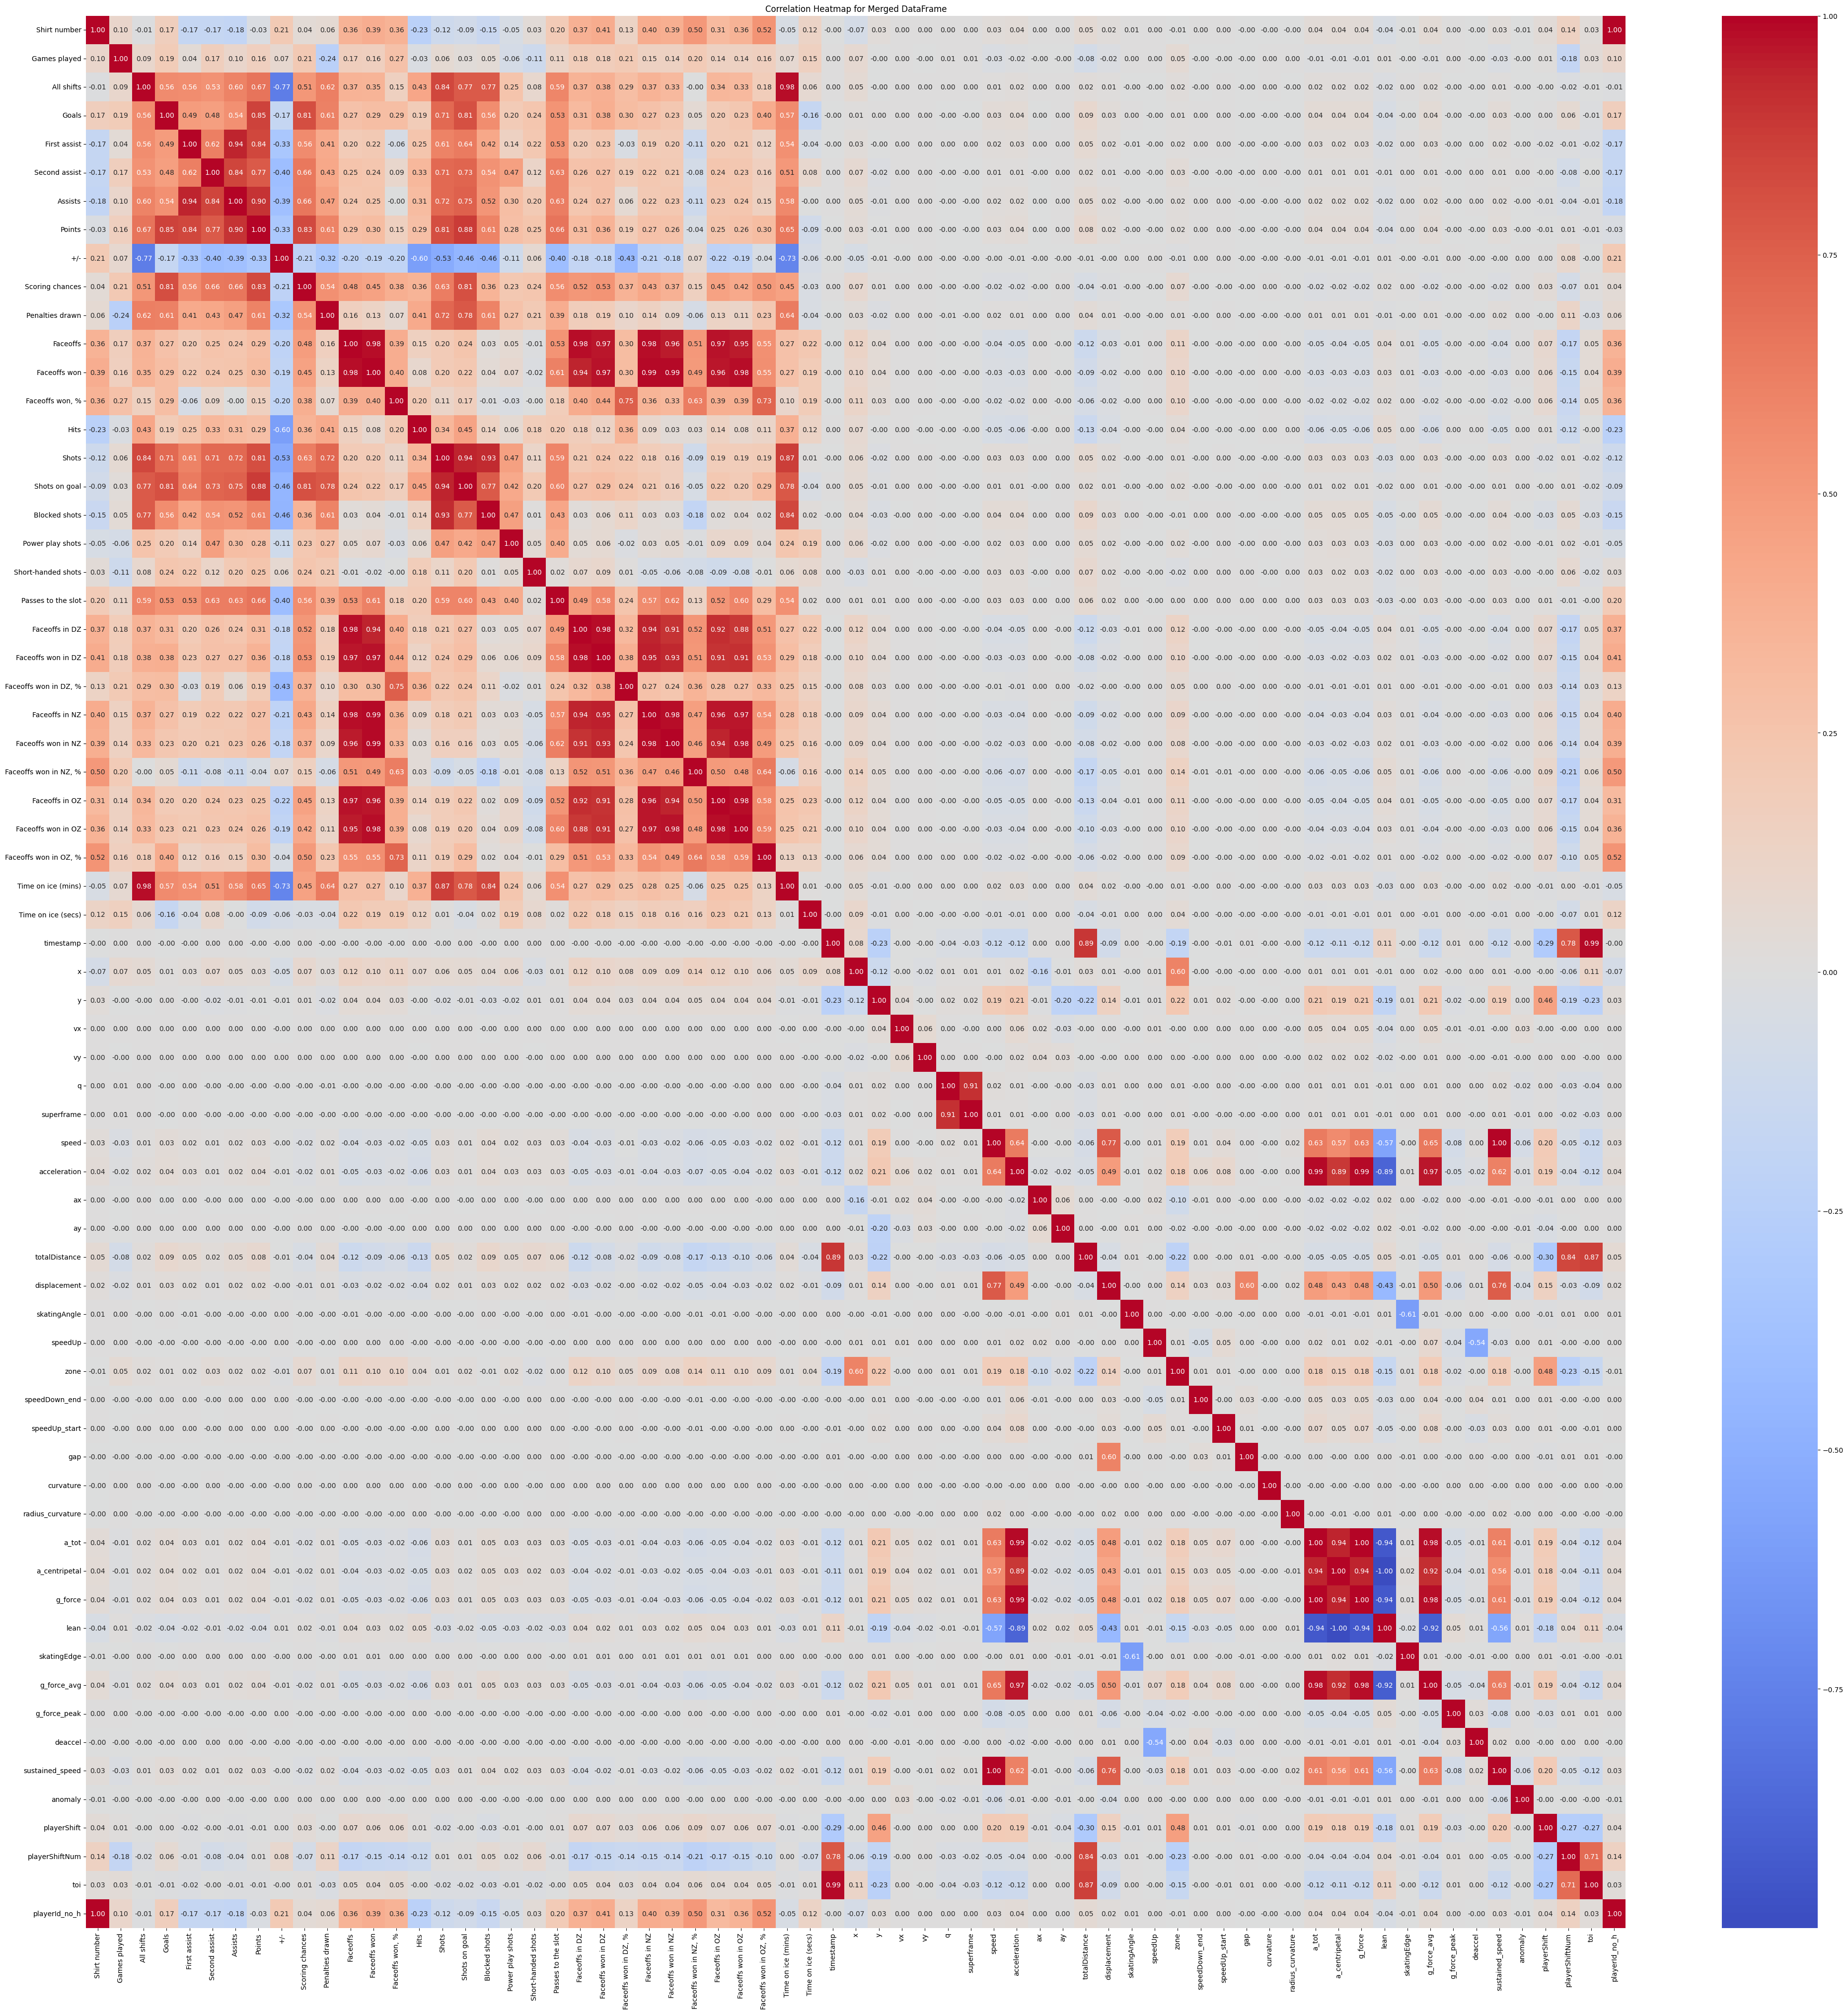

In [ ]:
# Select numerical columns for the heatmap
numerical_columns_merged = merge_drive_skaters.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix_merged = merge_drive_skaters[numerical_columns_merged].corr()

# Plot the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix_merged, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Merged DataFrame')
plt.show()

### Heatmap Correlation Analysis DRIVE vs ALL Skaters Data

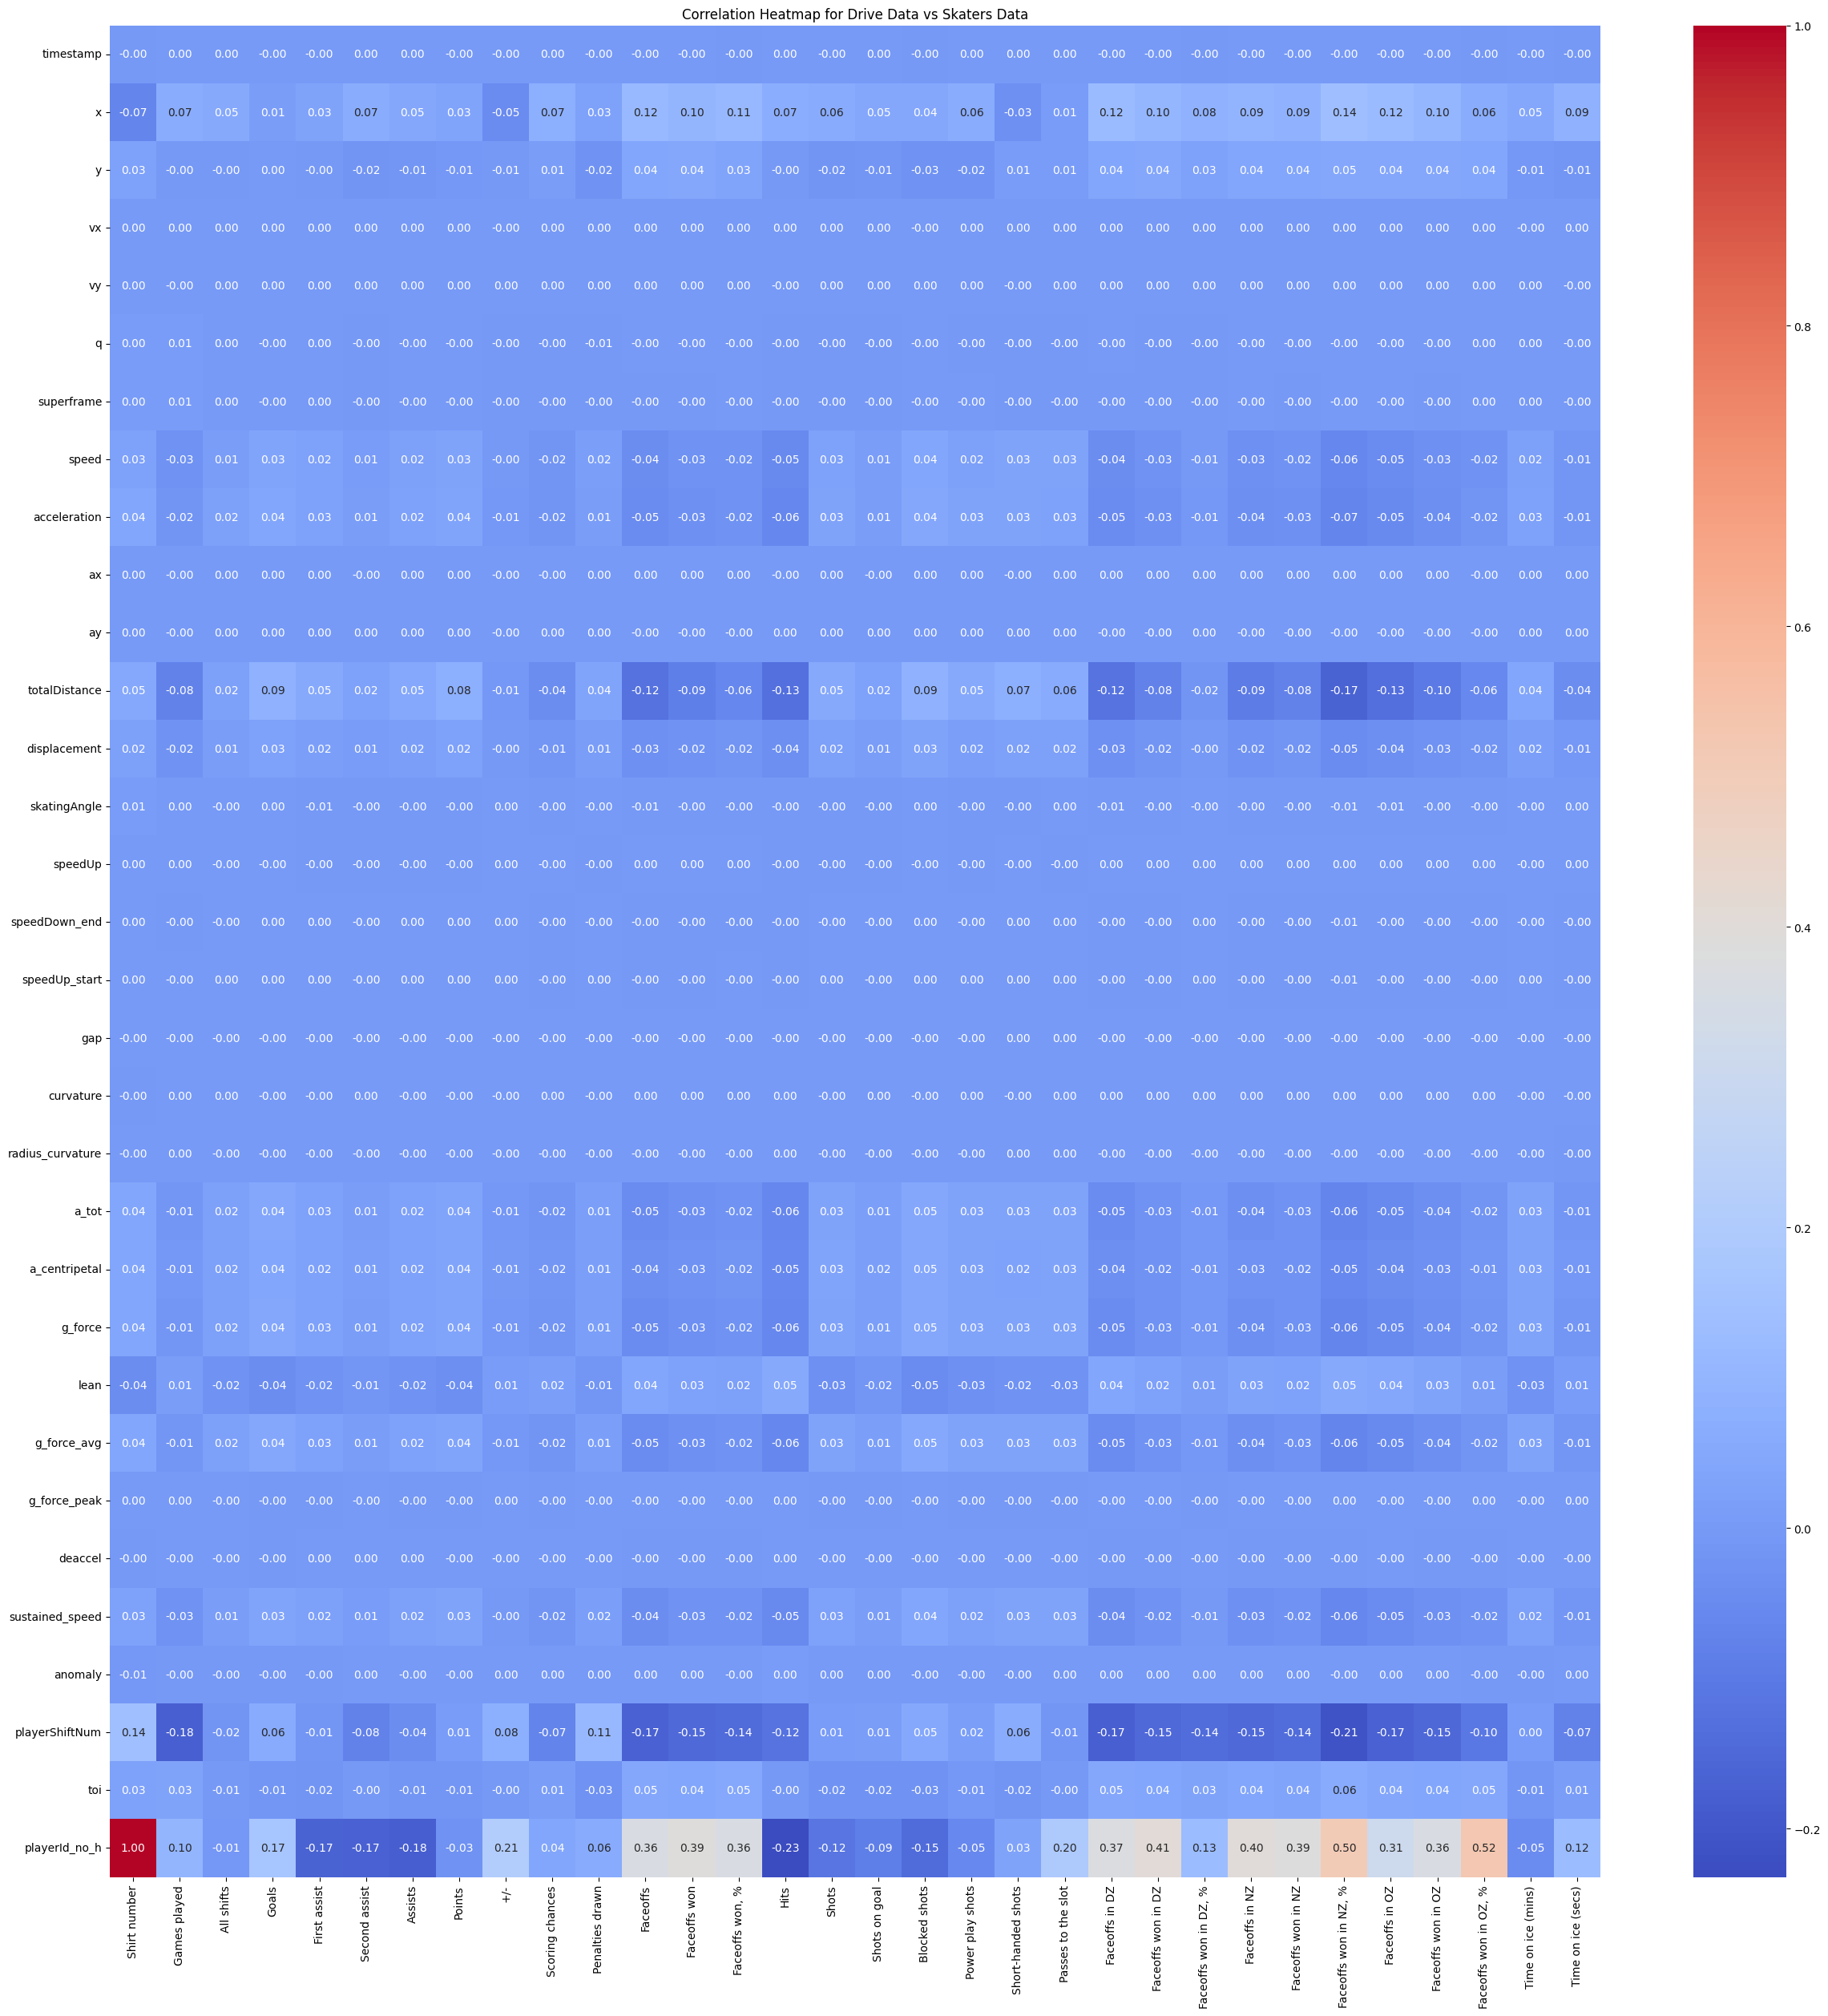

In [ ]:
# Compute the correlation matrix for the merged dataframe
numeric_columns = merge_drive_skaters.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merge_drive_skaters[numeric_columns].corr()

# Get the columns from each dataset
drive_columns = drive.select_dtypes(include=['float64', 'int64']).columns
skaters_columns = instat_skaters.select_dtypes(include=['float64', 'int64']).columns

# Filter the correlation matrix to include only drive vs skaters correlations
filtered_correlation_matrix = correlation_matrix.loc[drive_columns, skaters_columns]

# Plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Drive Data vs Skaters Data')
plt.show()

In [ ]:
# Compute the correlation matrix for the merged dataframe
correlation_matrix = merge_drive_skaters[numeric_columns].corr()

# Get the columns from each dataset
drive_columns = drive.select_dtypes(include=['float64', 'int64']).columns
skaters_columns = instat_skaters.select_dtypes(include=['float64', 'int64']).columns

# Filter the correlation matrix to include only drive vs skaters correlations
filtered_correlation_matrix = correlation_matrix.loc[drive_columns, skaters_columns]

# Unstack the filtered correlation matrix to get a series of correlations
correlation_series = filtered_correlation_matrix.unstack()

# Sort the series by absolute value of correlation in descending order
sorted_correlations = correlation_series.abs().sort_values(ascending=False)

# Display the top correlations
top_correlations = sorted_correlations.head(10)
print("Top 10 highest correlations between the two datasets:")
print(top_correlations)

Top 10 highest correlations between the two datasets:
Shirt number           playerId_no_h    1.000000
Faceoffs won in OZ, %  playerId_no_h    0.524536
Faceoffs won in NZ, %  playerId_no_h    0.504844
Faceoffs won in DZ     playerId_no_h    0.405173
Faceoffs in NZ         playerId_no_h    0.399615
Faceoffs won           playerId_no_h    0.390692
Faceoffs won in NZ     playerId_no_h    0.386946
Faceoffs in DZ         playerId_no_h    0.371957
Faceoffs won, %        playerId_no_h    0.363529
Faceoffs won in OZ     playerId_no_h    0.363231
dtype: float64


### Heatmap Correlation Analysis Based on Skater Position

In [ ]:
# Create separate data frames for each position
positions = merge_drive_skaters['Position'].unique()
position_dfs = {position: merge_drive_skaters[merge_drive_skaters['Position'] == position] for position in positions}

# Display the first few rows of each position's data frame
for position, df in position_dfs.items():
    print(f"DataFrame for position {position}:")
    display(df.head())

DataFrame for position F:


,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi,zone_cat,skatingEdge_cat,playerShift_cat,playerId_no_h
0,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.1,P44,left,entered,6.0
1,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.2,P44,linear,entered,6.0
2,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.3,P44,linear,entered,6.0
3,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.4,P44,linear,entered,6.0
4,6,Alyssa Wilson,F,18:39,18,22.0,0.0,0.0,0.06,0.06,...,1.0,0.280549,1.0,1.0,0.0,0.5,P44,linear,entered,6.0


DataFrame for position D:


,Shirt number,Player,Position,Time on ice,Games played,All shifts,Goals,First assist,Second assist,Assists,...,deaccel,sustained_speed,anomaly,playerShift,playerShiftNum,toi,zone_cat,skatingEdge_cat,playerShift_cat,playerId_no_h
519425,11,Savannah Potratz,D,07:15,13,8.0,0.0,0.0,0.0,0.0,...,1.0,1.791371,1.0,1.0,0.0,0.1,P25,linear,entered,11.0
519426,11,Savannah Potratz,D,07:15,13,8.0,0.0,0.0,0.0,0.0,...,1.0,1.791371,1.0,1.0,0.0,0.2,P25,linear,entered,11.0
519427,11,Savannah Potratz,D,07:15,13,8.0,0.0,0.0,0.0,0.0,...,1.0,1.791371,1.0,1.0,0.0,0.3,P24,linear,entered,11.0
519428,11,Savannah Potratz,D,07:15,13,8.0,0.0,0.0,0.0,0.0,...,1.0,1.791371,1.0,1.0,0.0,0.4,P24,linear,entered,11.0
519429,11,Savannah Potratz,D,07:15,13,8.0,0.0,0.0,0.0,0.0,...,1.0,1.791371,1.0,1.0,0.0,0.5,P24,linear,entered,11.0


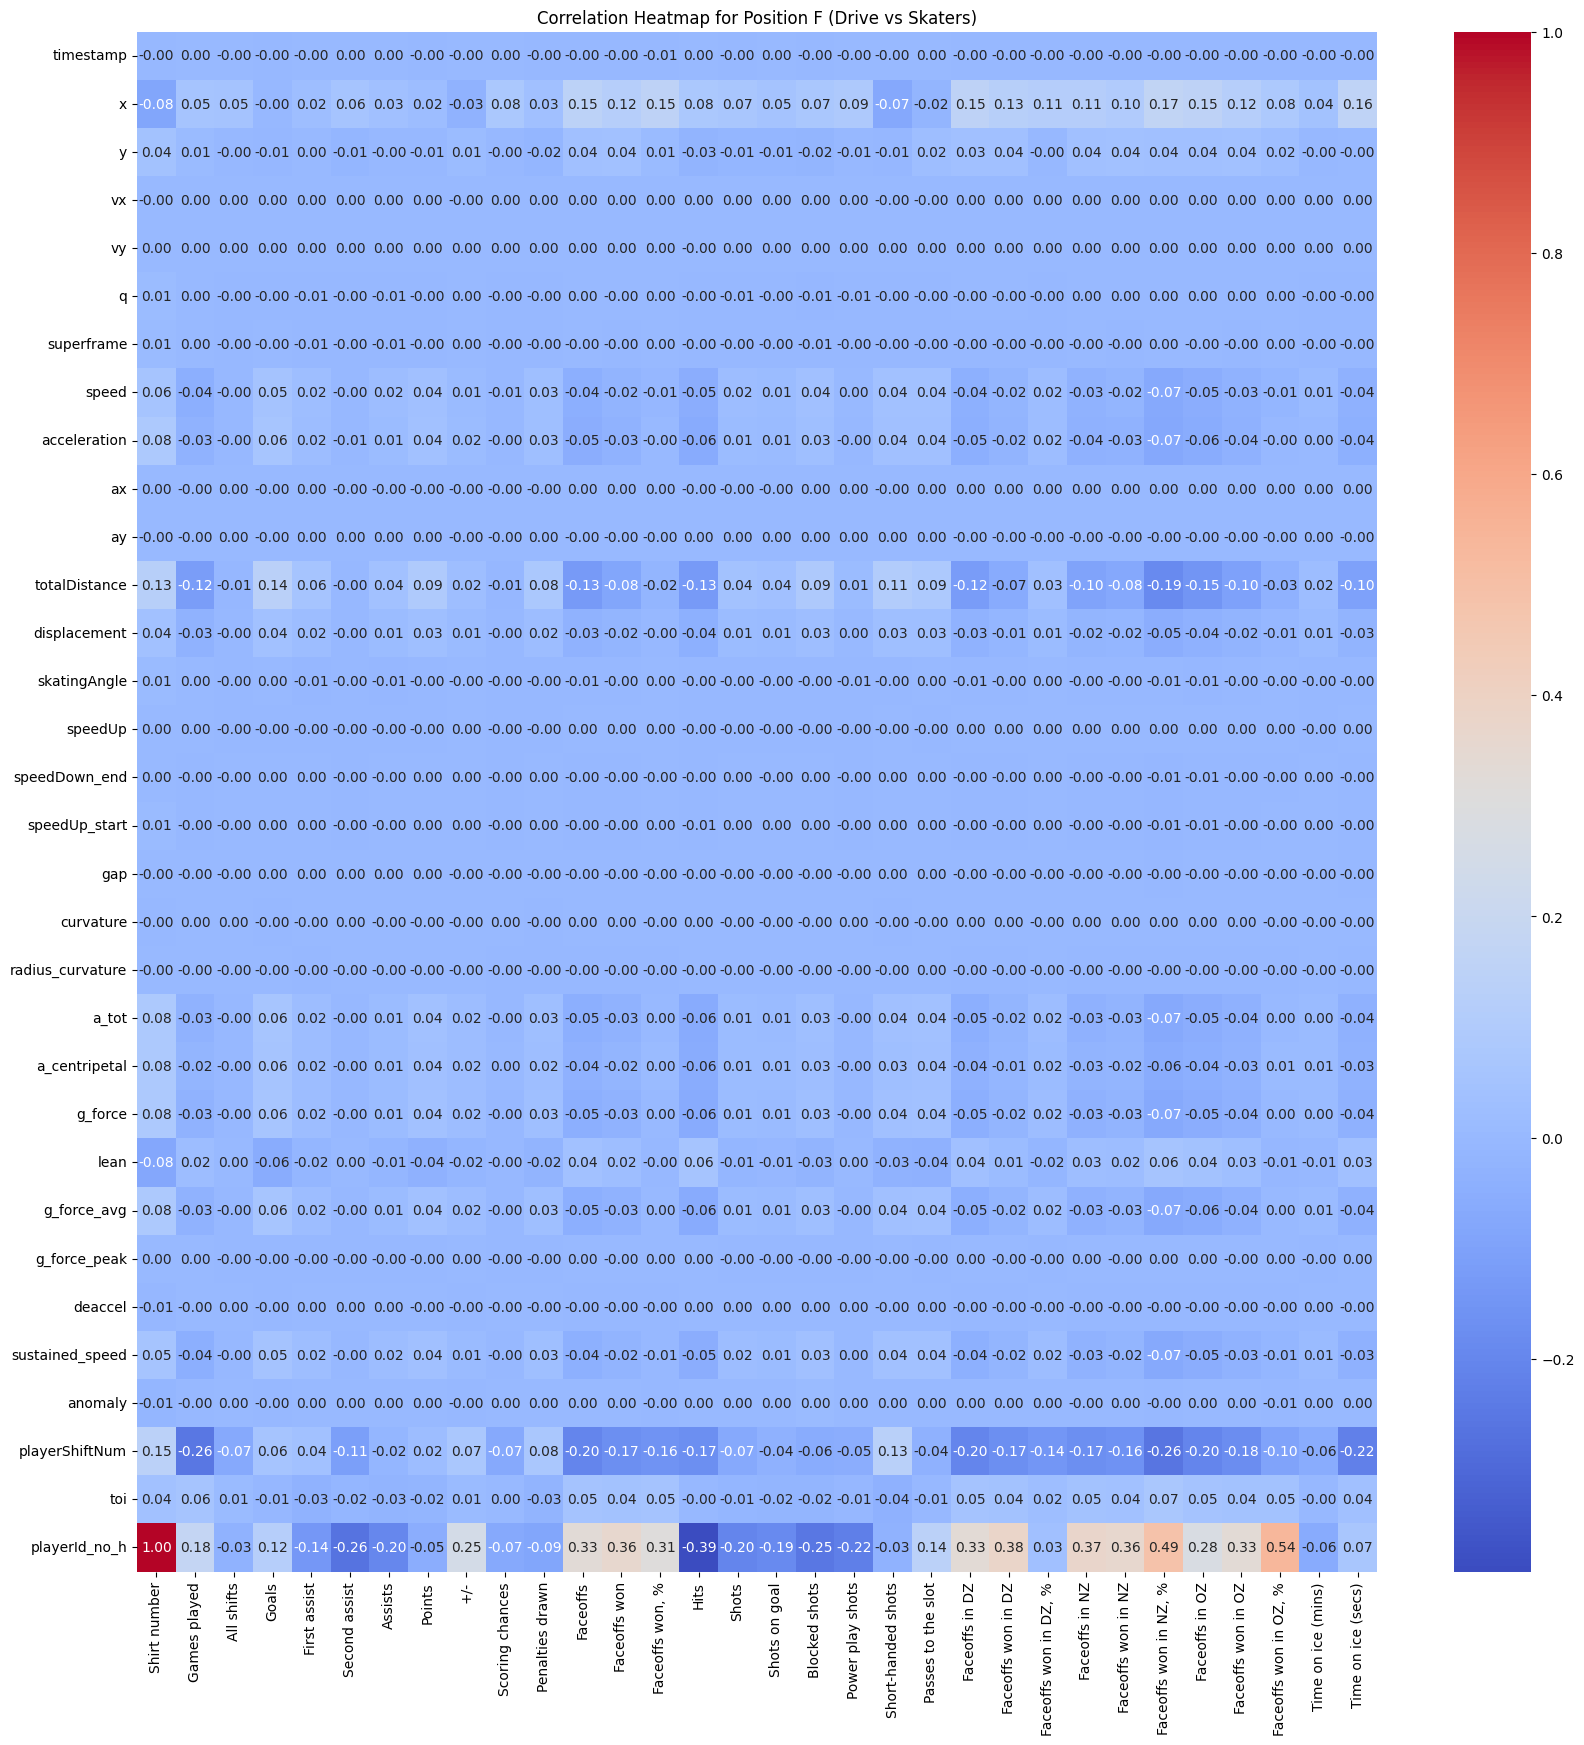

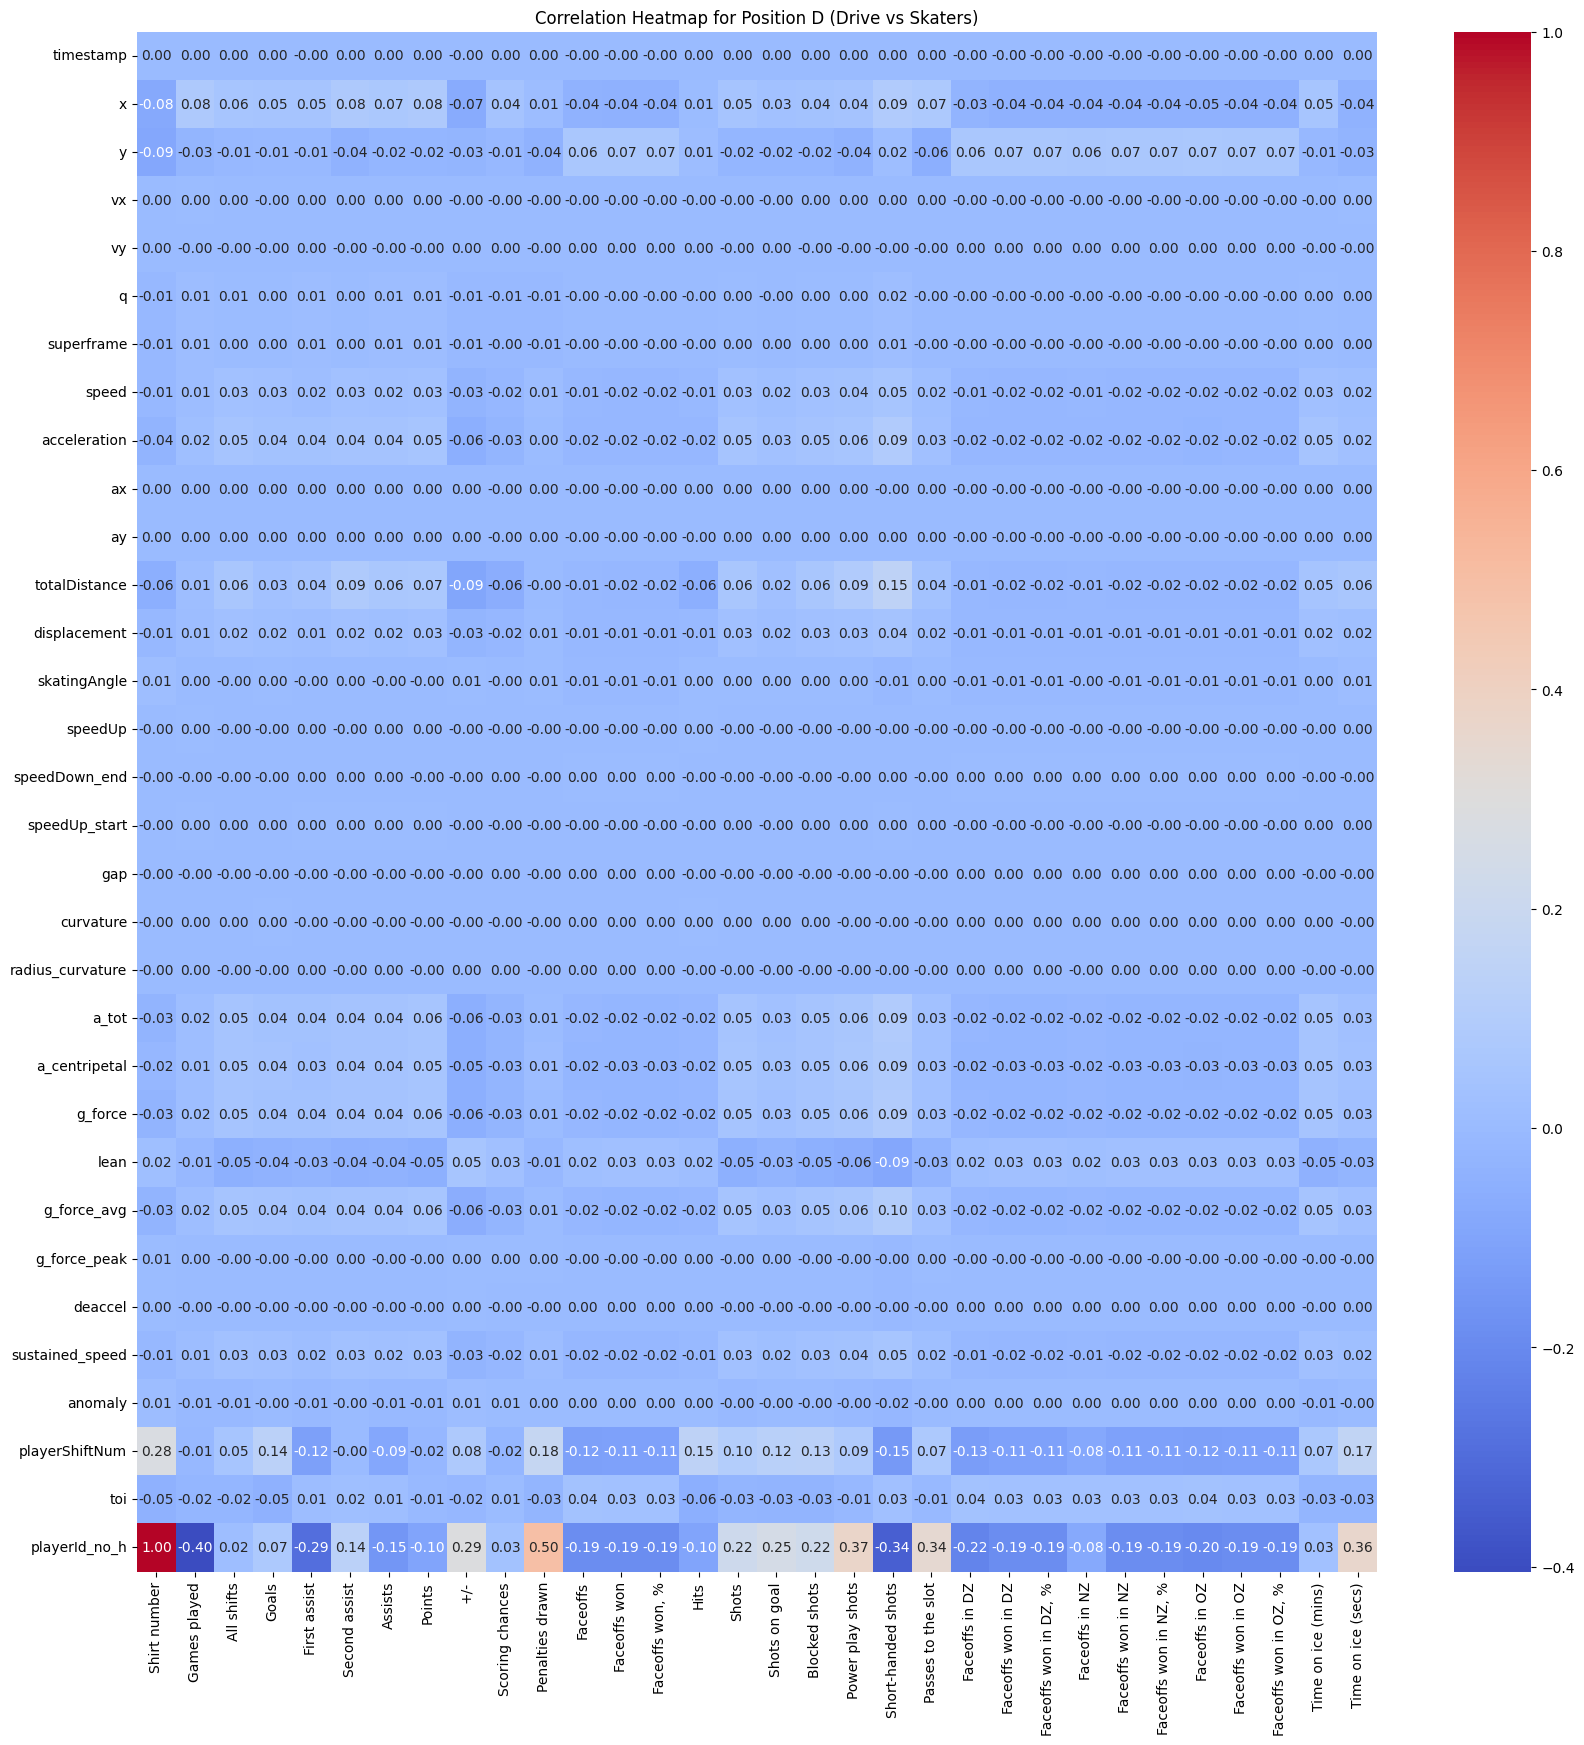

In [ ]:
# Create heatmaps for each position with only the separate datasets
for position, df in position_dfs.items():
    # Select numerical columns for the heatmap
    numerical_columns_position = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Get the columns from each dataset
    drive_columns_position = drive.select_dtypes(include=['float64', 'int64']).columns
    skaters_columns_position = instat_skaters.select_dtypes(include=['float64', 'int64']).columns
    
    # Create a correlation matrix
    correlation_matrix_position = df[numerical_columns_position].corr()
    
    # Filter the correlation matrix to include only drive vs skaters correlations
    filtered_correlation_matrix_position = correlation_matrix_position.loc[drive_columns_position, skaters_columns_position]
    
    # Plot the heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(filtered_correlation_matrix_position, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for Position {position} (Drive vs Skaters)')
    plt.show()

## KMeans Clustering on Skaters Position 

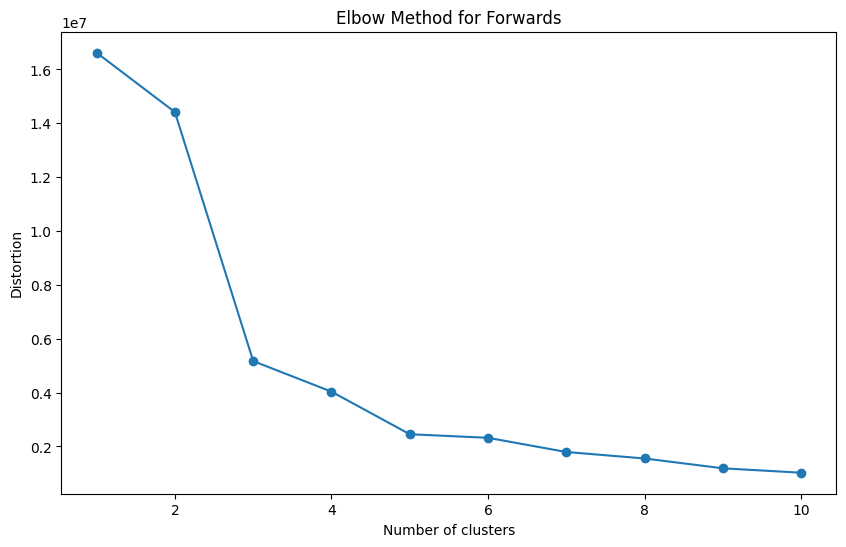

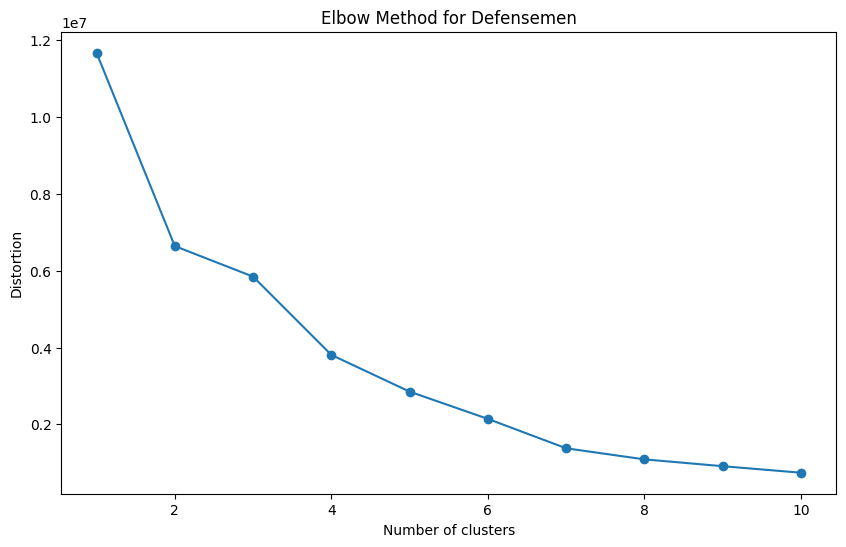

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Function to perform the Elbow method
def elbow_method(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    return distortions

# Select numerical columns for clustering
numerical_columns = ['Games played', 'Goals', 'Assists', 'Points', 'Shots', 'Shots on goal', 'Hits', 'Blocked shots']

# Standardize the data
scaler = StandardScaler()

# Elbow method for forwards
forwards_data = position_dfs['F'][numerical_columns].dropna()
forwards_data_scaled = scaler.fit_transform(forwards_data)
forwards_distortions = elbow_method(forwards_data_scaled)

# Plot the Elbow method for forwards
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), forwards_distortions, marker='o')
plt.title('Elbow Method for Forwards')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Elbow method for defensemen
defensemen_data = position_dfs['D'][numerical_columns].dropna()
defensemen_data_scaled = scaler.fit_transform(defensemen_data)
defensemen_distortions = elbow_method(defensemen_data_scaled)

# Plot the Elbow method for defensemen
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), defensemen_distortions, marker='o')
plt.title('Elbow Method for Defensemen')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

/var/folders/fn/1h19dxrs6m105yhjv2k86ryr0000gn/T/ipykernel_2818/4239952662.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_dfs['F']['Cluster'] = forwards_clusters


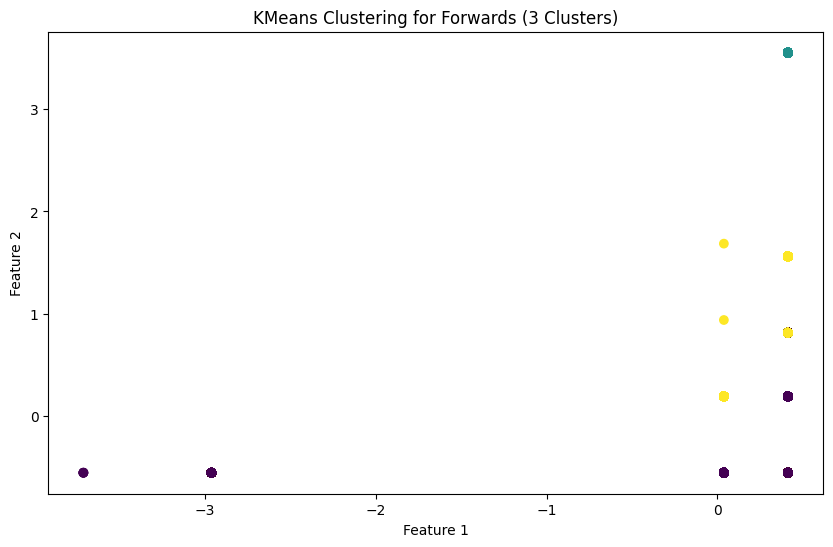

/var/folders/fn/1h19dxrs6m105yhjv2k86ryr0000gn/T/ipykernel_2818/4239952662.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_dfs['D']['Cluster_2'] = defensemen_clusters_2
/var/folders/fn/1h19dxrs6m105yhjv2k86ryr0000gn/T/ipykernel_2818/4239952662.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  position_dfs['D']['Cluster_3'] = defensemen_clusters_3
/var/folders/fn/1h19dxrs6m105yhjv2k86ryr0000gn/T/ipykernel_2818/4239952662.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy o

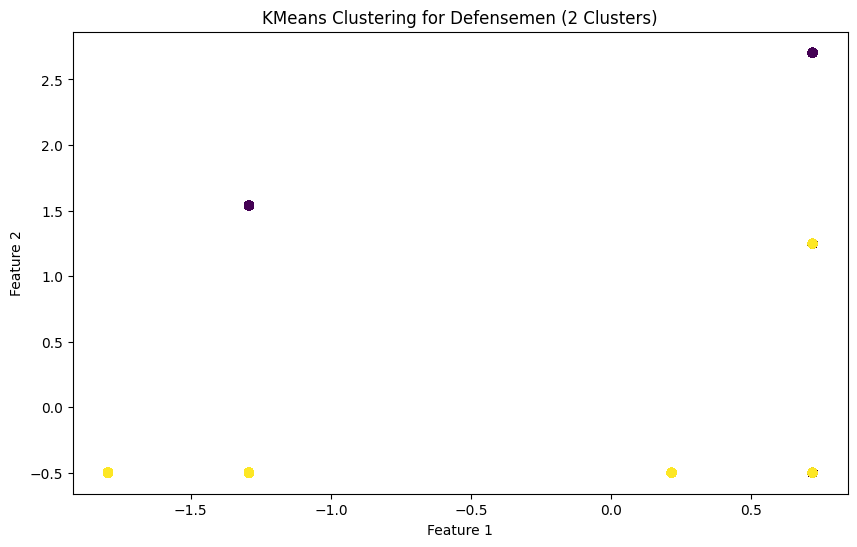

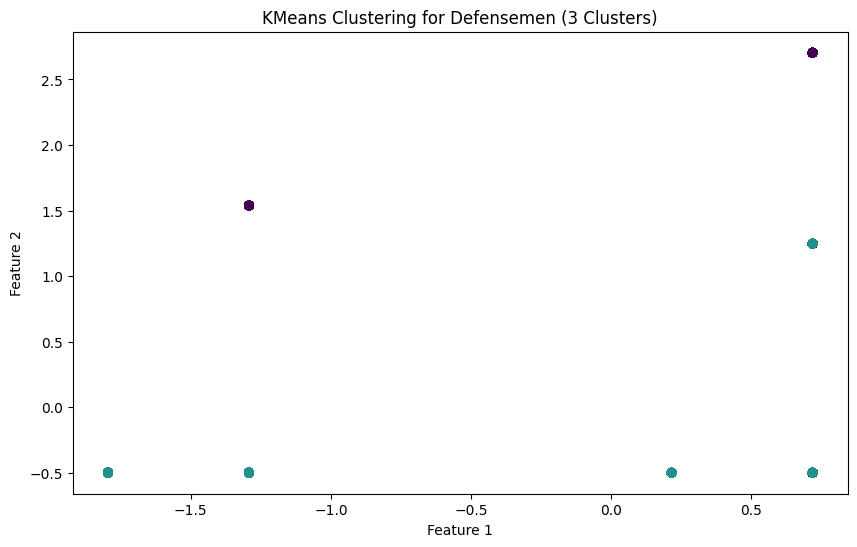

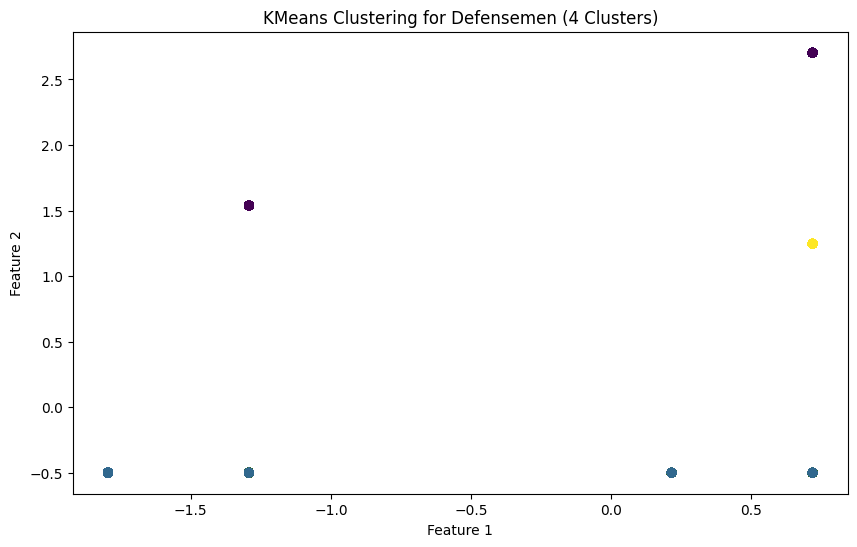

In [ ]:
# Function to perform KMeans clustering and plot the results
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans

# Perform KMeans clustering for forwards with 3 clusters
forwards_clusters, forwards_kmeans = kmeans_clustering(forwards_data_scaled, 3)

# Add the cluster labels to the forwards dataframe
position_dfs['F']['Cluster'] = forwards_clusters

# Plot the clusters for forwards
plt.figure(figsize=(10, 6))
plt.scatter(forwards_data_scaled[:, 0], forwards_data_scaled[:, 1], c=forwards_clusters, cmap='viridis')
plt.title('KMeans Clustering for Forwards (3 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Perform KMeans clustering for defensemen with 2, 3, and 4 clusters
defensemen_clusters_2, defensemen_kmeans_2 = kmeans_clustering(defensemen_data_scaled, 2)
defensemen_clusters_3, defensemen_kmeans_3 = kmeans_clustering(defensemen_data_scaled, 3)
defensemen_clusters_4, defensemen_kmeans_4 = kmeans_clustering(defensemen_data_scaled, 4)

# Add the cluster labels to the defensemen dataframe
position_dfs['D']['Cluster_2'] = defensemen_clusters_2
position_dfs['D']['Cluster_3'] = defensemen_clusters_3
position_dfs['D']['Cluster_4'] = defensemen_clusters_4

# Plot the clusters for defensemen with 2 clusters
plt.figure(figsize=(10, 6))
plt.scatter(defensemen_data_scaled[:, 0], defensemen_data_scaled[:, 1], c=defensemen_clusters_2, cmap='viridis')
plt.title('KMeans Clustering for Defensemen (2 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the clusters for defensemen with 3 clusters
plt.figure(figsize=(10, 6))
plt.scatter(defensemen_data_scaled[:, 0], defensemen_data_scaled[:, 1], c=defensemen_clusters_3, cmap='viridis')
plt.title('KMeans Clustering for Defensemen (3 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Plot the clusters for defensemen with 4 clusters
plt.figure(figsize=(10, 6))
plt.scatter(defensemen_data_scaled[:, 0], defensemen_data_scaled[:, 1], c=defensemen_clusters_4, cmap='viridis')
plt.title('KMeans Clustering for Defensemen (4 Clusters)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()